In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = './Vehicle.csv'
df = pd.read_csv(file_path)

In [3]:
# Step 1: Preprocess the data

# Convert 'Review Date' to datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Label Encoding for 'Vehicle Type/Model' and 'Predicted Maintenance Label'
le_vehicle = LabelEncoder()
df['Vehicle Type/Model'] = le_vehicle.fit_transform(df['Vehicle Type/Model'])

le_label = LabelEncoder()
df['Predicted Maintenance Label'] = le_label.fit_transform(df['Predicted Maintenance Label'])


In [4]:
# Text preprocessing for 'Review Text' using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X_text = tfidf.fit_transform(df['Review Text']).toarray()

# Feature scaling for numeric columns
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[['Vehicle ID', 'Rating']])

# Combine all features (numeric, encoded, and text)
X = np.hstack((X_numeric, X_text, df[['Vehicle Type/Model']].values))

# Target variable
y = df['Predicted Maintenance Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 2: Implement five machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [7]:
# Step 3: Train models and evaluate performance
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate using various metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    
    # Store the results
    results[model_name] = metrics

results

{'Logistic Regression': {'Accuracy': 0.8666666666666667,
  'Precision': 0.9285714285714286,
  'Recall': 0.8125,
  'F1 Score': 0.8666666666666667,
  'ROC AUC': 0.9508928571428572},
 'Random Forest': {'Accuracy': 0.9666666666666667,
  'Precision': 0.9411764705882353,
  'Recall': 1.0,
  'F1 Score': 0.9696969696969697,
  'ROC AUC': 1.0},
 'Support Vector Machine': {'Accuracy': 0.5333333333333333,
  'Precision': 0.5333333333333333,
  'Recall': 1.0,
  'F1 Score': 0.6956521739130435,
  'ROC AUC': 0.7321428571428571},
 'Decision Tree': {'Accuracy': 0.9,
  'Precision': 0.9333333333333333,
  'Recall': 0.875,
  'F1 Score': 0.9032258064516129,
  'ROC AUC': 0.9017857142857143},
 'K-Nearest Neighbors': {'Accuracy': 0.8333333333333334,
  'Precision': 0.9230769230769231,
  'Recall': 0.75,
  'F1 Score': 0.8275862068965517,
  'ROC AUC': 0.9129464285714286}}

In [11]:
# Confusion Matrix Plot using ConfusionMatrixDisplay
def plot_confusion_matrices(models, X_test, y_test):
    plt.figure(figsize=(15, 10))
    for i, (model_name, model) in enumerate(models.items()):
        plt.subplot(2, 3, i + 1)
        disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=plt.gca(), colorbar=False)
        plt.title(model_name)
    plt.tight_layout()
    plt.show()

# ROC Curve Plot
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Distribution of Ratings Plot
def plot_rating_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Rating', data=df)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

# Bar Plot for Model Performance Comparison
def plot_model_performance(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    plt.figure(figsize=(12, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i + 1)
        sns.barplot(x=list(results.keys()), y=[results[model][metric] for model in results])
        plt.title(metric)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



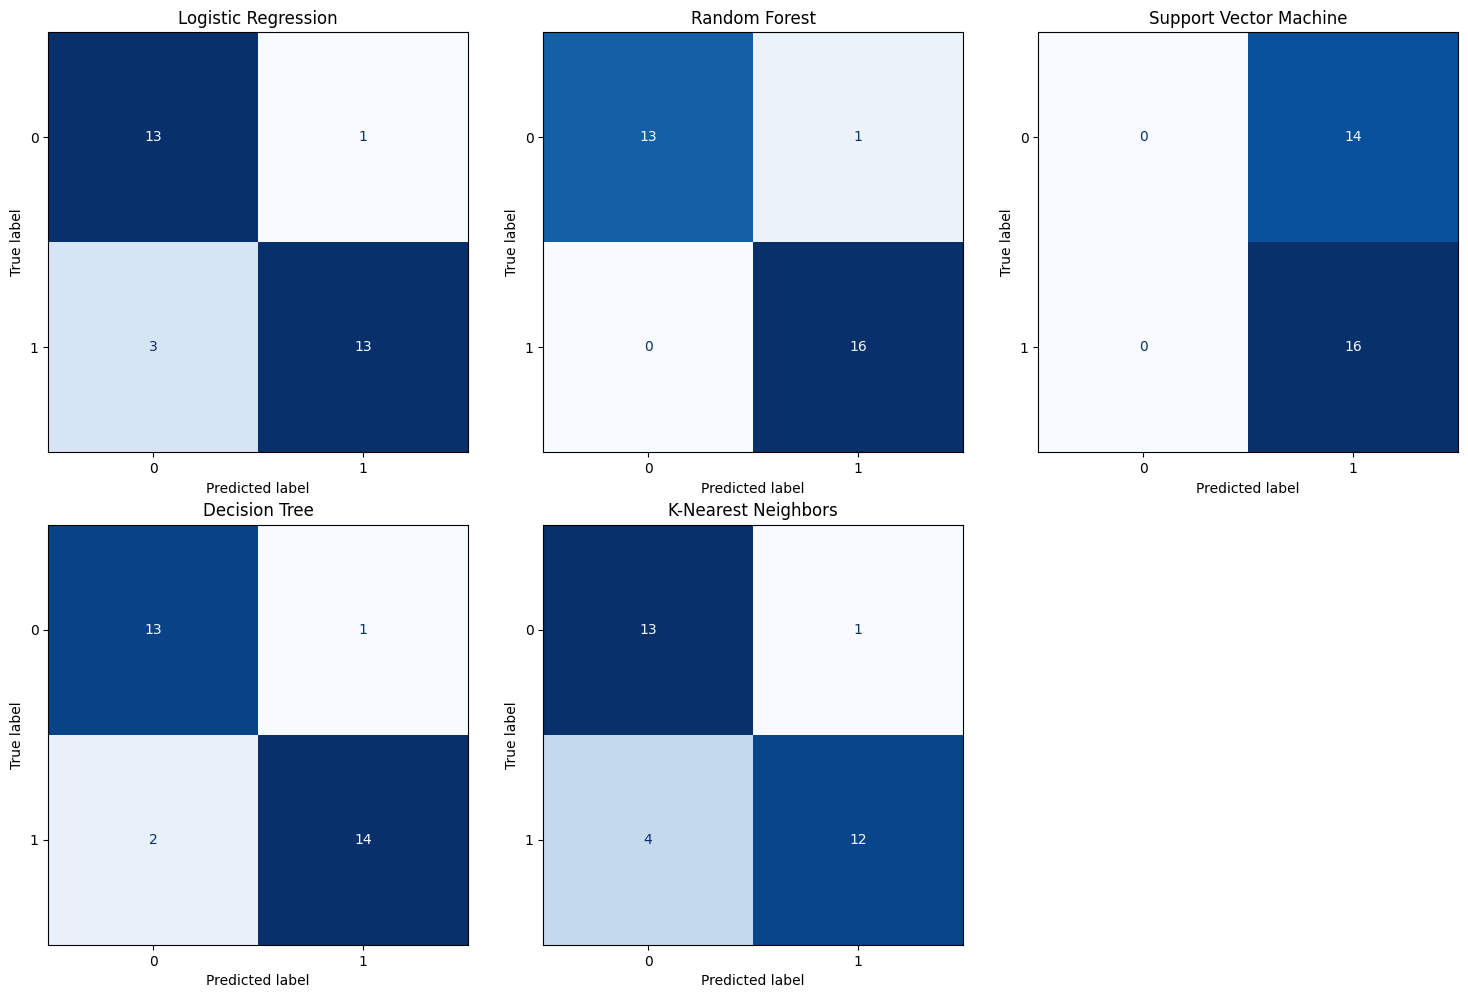

In [12]:
# Plotting confusion matrices for all models
plot_confusion_matrices(models, X_test, y_test)

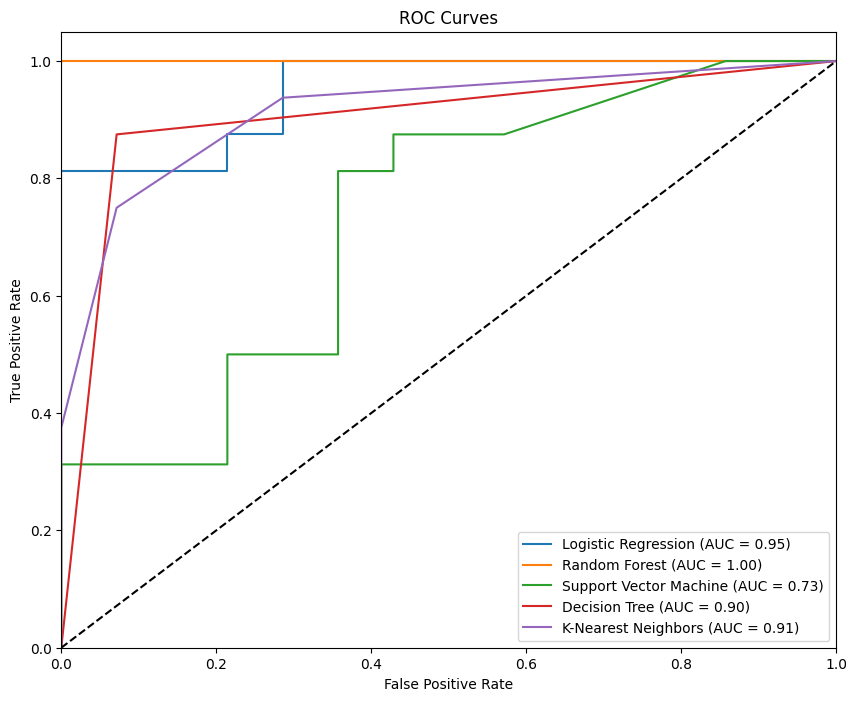

In [13]:
# Plotting ROC curves for all models
plot_roc_curves(models, X_test, y_test)

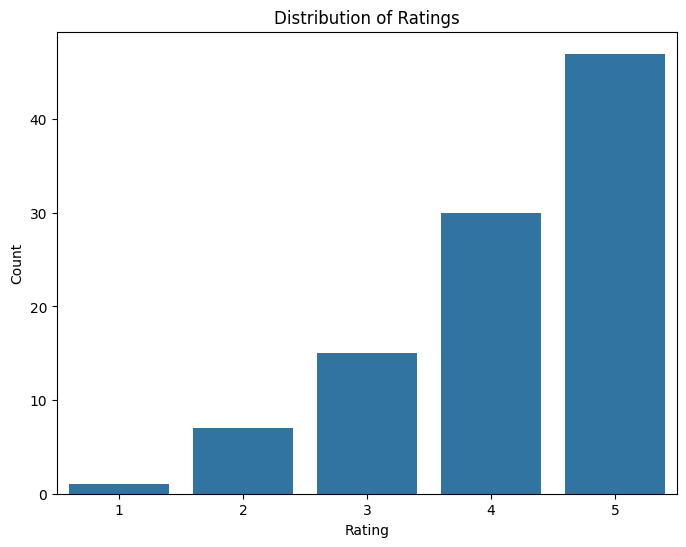

In [14]:
# Plotting the distribution of ratings
plot_rating_distribution(df)


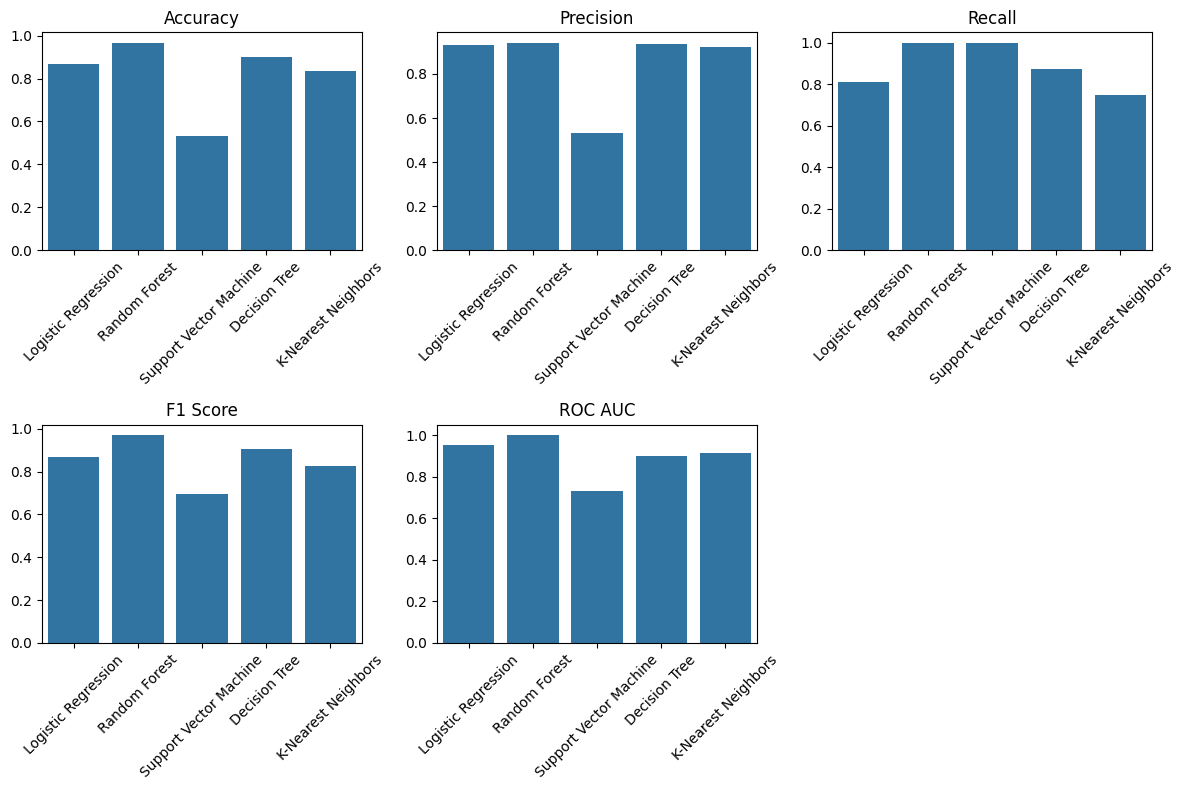

In [15]:

# Plotting model performance comparison
plot_model_performance(results)

In [9]:
# Determine the best model based on F1 Score
best_model_name = max(results, key=lambda model: results[model]['F1 Score'])
best_f1_score = results[best_model_name]['F1 Score']

print(f"The best model based on F1 Score is: {best_model_name} with a score of {best_f1_score:.4f}")


The best model based on F1 Score is: Random Forest with a score of 0.9697


### 1. Performance Summary

Here's a summary of the performance of each model across the chosen metrics:



Mode -  Accuracy	   - Precision	   - Recall	   -F1 Score	   - ROC AUC


Logistic Regression	- 0.867	- 0.929	- 0.813	- 0.867	- 0.951


Random Forest	- 0.967	- 0.941	- 1.000	- 0.970	- 1.000


Support Vector Machine	- 0.533	- 0.533	- 1.000	- 0.696	- 0.732


Decision Tree	- 0.900	- 0.933	- 0.875	- 0.903	- 0.902


K-Nearest Neighbors	- 0.833	- 0.923	- 0.750	- 0.828	- 0.913


### 2. Analysis of the Results
- Accuracy:
Random Forest has the highest accuracy (96.67%), followed by Decision Tree (90.00%), and Logistic Regression (86.67%). This suggests that Random Forest is the most reliable in predicting the correct label overall.

- Precision:
Random Forest and Logistic Regression both exhibit high precision (94.12% and 92.86% respectively), indicating they are effective at minimizing false positives.

- Recall:
Support Vector Machine (SVM) and Random Forest both achieved perfect recall (100%), meaning they were able to correctly identify all positive instances. However, the low accuracy and F1 score of SVM suggest it may have a high false positive rate.

- F1 Score:
Random Forest leads with an F1 Score of 0.970, followed by Decision Tree at 0.903. The F1 score balances precision and recall, making Random Forest the best performer in terms of overall classification balance.

- ROC AUC:
Random Forest again outperforms other models with a perfect ROC AUC of 1.0, indicating excellent discriminative ability between the positive and negative classes. Logistic Regression and K-Nearest Neighbors also have strong ROC AUC scores (0.951 and 0.913 respectively).

### 3. Insights and Conclusions
- Best Performing Model:

The Random Forest model is the best-performing algorithm across almost all metrics, particularly excelling in accuracy, recall, F1 score, and ROC AUC. This indicates that it is highly effective at both correctly classifying instances and distinguishing between classes.
- Support Vector Machine (SVM) Performance:

The Support Vector Machine (SVM) showed a perfect recall but significantly lower accuracy, precision, and F1 score. This suggests that while SVM identified all positives correctly, it struggled with false positives, leading to lower overall performance.
- Decision Tree vs. Random Forest:

While the Decision Tree performed well, the Random Forest model outperformed it in every metric. This is expected, as Random Forest is an ensemble method that reduces overfitting and improves generalization by aggregating the predictions of multiple decision trees.
- K-Nearest Neighbors (KNN):

KNN performed moderately well, particularly in precision, but it lagged behind the Random Forest and Decision Tree in recall and F1 score. This suggests that KNN might be less effective when dealing with imbalanced or complex data.